# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 3 point scale (0, 1, or 2). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

Score | Expectations
----- | ------------
**0** | _Does not meet expectations. Try again._
**1** | _Meets expectations. Good job._
**2** | _Surpasses expectations. Brilliant!_

[For more information on how we grade our DSI projects, see our project grading walkthrough.](https://git.generalassemb.ly/dsi-projects/readme/blob/master/README.md)


<div class="alert alert-info">

## 1. EDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 100000)

In [2]:
job_data = pd.read_csv('job_data.csv')

In [3]:
job_data.head()

,company_name,job_title,salary,salary_type,work_location,emp_type,seniority,job_cat,job_details
0,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,"$4,500to$6,800",Monthly,19 CHINA STREET 049561,Full Time,Manager,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...
1,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,"$4,500to$7,000",Monthly,19 CHINA STREET 049561,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...
2,IRISNATION SINGAPORE PTE. LTD.,Campaign Manager,"$4,000to$6,000",Monthly,19 CHINA STREET 049561,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...
3,Ministry of Social and Family Development,"Assistant Manager (Systems, Exclusion and Visi...",Salary undisclosed,NaN,"MSF BUILDING, 512 THOMSON ROAD 298136",Full Time,NaN,Public / Civil Service,Roles & ResponsibilitiesThe Gambling Safeguard...
4,THE SUPREME HR ADVISORY PTE. LTD.,Account Cum Admin / / Senior Level / / 2...,"$2,800to$3,000",Monthly,"AZ @ PAYA LEBAR, 140 PAYA LEBAR ROAD 409015","Permanent, Full Time",Senior Executive,Consulting,Roles & ResponsibilitiesResponsibilities: Exec...


In [4]:
job_data.shape

(4100, 9)

In [5]:
job_data.columns

Index(['company_name', 'job_title', 'salary', 'salary_type', 'work_location', 'emp_type', 'seniority', 'job_cat', 'job_details'], dtype='object')

In [6]:
job_data.isnull().sum()

company_name      167
job_title         167
salary            167
salary_type       627
work_location    1097
emp_type          167
seniority         253
job_cat           167
job_details       167
dtype: int64

In [7]:
# Drop rows with all NaN (link is no longer valid hence no data)

job_data = job_data.dropna(how='all')

In [8]:
job_data.shape

(3933, 9)

In [9]:
# after dropping rows, reset index to prevent errors when more rows are dropped

job_data.reset_index(drop=True, inplace=True)
job_data.tail()

,company_name,job_title,salary,salary_type,work_location,emp_type,seniority,job_cat,job_details
3928,Health Promotion Board,"Senior Manager / Assistant Director, Busines...",Salary undisclosed,NaN,3 SECOND HOSPITAL AVENUE 168937,Full Time,Executive,"Marketing / Public Relations , Public / Civil ...",Roles & ResponsibilitiesThe National Healthy P...
3929,GOVERNMENT TECHNOLOGY AGENCY,"Business Analyst, Digital Services (Internet &...",Salary undisclosed,NaN,"MAPLETREE BUSINESS CITY, 10 PASIR PANJANG ROAD...",Permanent,Professional,"Information Technology, Public / Civil Service",Roles & Responsibilities Do you want to apply ...
3930,Health Promotion Board,"Manager / Senior Manager, Preventive Health ...",Salary undisclosed,NaN,3 SECOND HOSPITAL AVENUE 168937,Full Time,Executive,"Marketing / Public Relations , Public / Civil ...",Roles & ResponsibilitiesPreventive Health Mark...
3931,GOVERNMENT TECHNOLOGY AGENCY,Business Analyst (Data Analytics),Salary undisclosed,NaN,"MAPLETREE BUSINESS CITY, 10 PASIR PANJANG ROAD...",Full Time,Professional,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesBAF (Data Analytics) W...
3932,GOVERNMENT TECHNOLOGY AGENCY,Business Analyst (Digital Services),Salary undisclosed,NaN,"MAPLETREE BUSINESS CITY, 10 PASIR PANJANG ROAD...",Full Time,NaN,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesBA Digital Services (C...


In [10]:
# Checking that all NaN rows are dropped

job_data.isnull().sum()

company_name       0
job_title          0
salary             0
salary_type      460
work_location    930
emp_type           0
seniority         86
job_cat            0
job_details        0
dtype: int64

In [11]:
# Check for duplicate rows

duplicate = job_data.duplicated()

print('No. of duplicated rows:',job_data.duplicated().sum())

No. of duplicated rows: 155


In [12]:
duplicated_rows = [] # a list of duplicated row index numbers
for i, v in duplicate.iteritems():
    if v==True:
        duplicated_rows.append(i)

print(duplicated_rows)

[45, 125, 130, 131, 284, 479, 480, 602, 603, 610, 670, 671, 692, 781, 884, 885, 1033, 1037, 1095, 1128, 1145, 1146, 1147, 1158, 1194, 1228, 1247, 1260, 1313, 1355, 1394, 1397, 1398, 1399, 1438, 1442, 1443, 1444, 1449, 1450, 1467, 1517, 1601, 1607, 1752, 1761, 1848, 1916, 1959, 1966, 1985, 1988, 2013, 2014, 2015, 2016, 2018, 2020, 2021, 2022, 2024, 2053, 2054, 2085, 2191, 2195, 2207, 2209, 2224, 2225, 2256, 2363, 2368, 2384, 2402, 2465, 2516, 2561, 2583, 2587, 2603, 2618, 2648, 2649, 2673, 2719, 2735, 2779, 2789, 2838, 2839, 2840, 2896, 2936, 2954, 2956, 2980, 2989, 3007, 3008, 3021, 3029, 3098, 3114, 3141, 3174, 3183, 3237, 3255, 3256, 3258, 3259, 3288, 3329, 3374, 3383, 3449, 3450, 3452, 3477, 3553, 3554, 3589, 3637, 3648, 3656, 3657, 3663, 3673, 3674, 3685, 3687, 3688, 3689, 3690, 3691, 3697, 3701, 3702, 3703, 3704, 3750, 3759, 3783, 3828, 3833, 3835, 3840, 3859, 3860, 3863, 3865, 3867, 3868, 3869]


In [13]:
# Looking at the duplicated rows

job_data.iloc[duplicated_rows,:]

,company_name,job_title,salary,salary_type,work_location,emp_type,seniority,job_cat,job_details
45,ERNST & YOUNG ADVISORY PTE. LTD.,Big Data Engineer (Financial Services),"$6,000to$12,000",Monthly,1 RAFFLES QUAY 048583,Full Time,Manager,"Consulting , Banking and Finance, Information ...",Roles & ResponsibilitiesWe are the only profes...
125,MACHSPEED HUMAN RESOURCES PTE. LTD.,"Engineering Assistant-QA (S$1800-2000+OT, Day ...","$1,800to$2,000",Monthly,"GOLDEN WALL CENTRE, 89 SHORT STREET 188216",Permanent,Junior Executive,Engineering,Roles & ResponsibilitiesEngineering Assistant-...
130,MACHSPEED HUMAN RESOURCES PTE. LTD.,"Accounts Officer (3-6 months contract, Scienc...","$2,500to$2,800",Monthly,"GOLDEN WALL CENTRE, 89 SHORT STREET 188216",Permanent,Executive,Accounting / Auditing / Taxation,Roles & ResponsibilitiesAccounts Officer (3-6...
131,MACHSPEED HUMAN RESOURCES PTE. LTD.,"Production Planner (5 days, Clementi, $1800-2...","$1,800to$2,000",Monthly,"GOLDEN WALL CENTRE, 89 SHORT STREET 188216",Permanent,Junior Executive,"Admin / Secretarial, Manufacturing",Roles & ResponsibilitiesProduction Planner (5 ...
284,NATIONAL UNIVERSITY HOSPITAL (SINGAPORE) PTE LTD,Clinical Research Coordinator (Contract)_O&G D...,"$3,000to$5,000",Monthly,"NATIONAL UNIVERSITY HOSPITAL, 5 LOWER KENT RID...",Contract,Executive,Healthcare / Pharmaceutical,"Roles & Responsibilities Coordinate, evaluate ..."
479,MACHSPEED HUMAN RESOURCES PTE. LTD.,"Production Planner (5 days, Clementi, $1800-2...","$1,800to$2,000",Monthly,"GOLDEN WALL CENTRE, 89 SHORT STREET 188216",Permanent,Junior Executive,"Admin / Secretarial, Manufacturing",Roles & ResponsibilitiesProduction Planner (5 ...
480,MACHSPEED HUMAN RESOURCES PTE. LTD.,"Accounts Officer (3-6 months contract, Scienc...","$2,500to$2,800",Monthly,"GOLDEN WALL CENTRE, 89 SHORT STREET 188216",Permanent,Executive,Accounting / Auditing / Taxation,Roles & ResponsibilitiesAccounts Officer (3-6...
602,GOVERNMENT TECHNOLOGY AGENCY,Data Scientist,"$5,000to$8,000",Monthly,"MAPLETREE BUSINESS CITY, 10 PASIR PANJANG ROAD...",Permanent,Middle Management,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesWe are looking for Dat...
603,GOVERNMENT TECHNOLOGY AGENCY,Data Scientist,"$5,000to$8,000",Monthly,"MAPLETREE BUSINESS CITY, 10 PASIR PANJANG ROAD...",Permanent,Middle Management,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesWe are looking for Dat...
610,ERNST & YOUNG ADVISORY PTE. LTD.,"Technology Risk Manager (Data Analytics), Advi...","$6,000to$12,000",Monthly,1 RAFFLES QUAY 048583,Permanent,Manager,Consulting,Roles & ResponsibilitiesOur clients rely on us...


In [14]:
# Dropping all the duplicated rows

job_data.drop(duplicated_rows, inplace=True)

In [15]:
job_data.shape

# 3933 - 155 = 3778 rows check that correct number of rows were droppped

(3778, 9)

In [16]:
job_data.reset_index(drop=True, inplace=True)
job_data.tail()

,company_name,job_title,salary,salary_type,work_location,emp_type,seniority,job_cat,job_details
3773,Health Promotion Board,"Senior Manager / Assistant Director, Busines...",Salary undisclosed,NaN,3 SECOND HOSPITAL AVENUE 168937,Full Time,Executive,"Marketing / Public Relations , Public / Civil ...",Roles & ResponsibilitiesThe National Healthy P...
3774,GOVERNMENT TECHNOLOGY AGENCY,"Business Analyst, Digital Services (Internet &...",Salary undisclosed,NaN,"MAPLETREE BUSINESS CITY, 10 PASIR PANJANG ROAD...",Permanent,Professional,"Information Technology, Public / Civil Service",Roles & Responsibilities Do you want to apply ...
3775,Health Promotion Board,"Manager / Senior Manager, Preventive Health ...",Salary undisclosed,NaN,3 SECOND HOSPITAL AVENUE 168937,Full Time,Executive,"Marketing / Public Relations , Public / Civil ...",Roles & ResponsibilitiesPreventive Health Mark...
3776,GOVERNMENT TECHNOLOGY AGENCY,Business Analyst (Data Analytics),Salary undisclosed,NaN,"MAPLETREE BUSINESS CITY, 10 PASIR PANJANG ROAD...",Full Time,Professional,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesBAF (Data Analytics) W...
3777,GOVERNMENT TECHNOLOGY AGENCY,Business Analyst (Digital Services),Salary undisclosed,NaN,"MAPLETREE BUSINESS CITY, 10 PASIR PANJANG ROAD...",Full Time,NaN,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesBA Digital Services (C...


In [17]:
# After dropping NaN rows and duplicated rows, take a look at job_data:

job_data.isnull().sum()

company_name       0
job_title          0
salary             0
salary_type      454
work_location    881
emp_type           0
seniority         84
job_cat            0
job_details        0
dtype: int64

In [18]:
job_data.iloc[job_data[job_data['seniority'].isnull()].index,:]

,company_name,job_title,salary,salary_type,work_location,emp_type,seniority,job_cat,job_details
3,Ministry of Social and Family Development,"Assistant Manager (Systems, Exclusion and Visi...",Salary undisclosed,NaN,"MSF BUILDING, 512 THOMSON ROAD 298136",Full Time,NaN,Public / Civil Service,Roles & ResponsibilitiesThe Gambling Safeguard...
8,Ministry of Social and Family Development,Assistant Manager / Manager (Child and Family ...,Salary undisclosed,NaN,"MSF BUILDING, 512 THOMSON ROAD 298136",Full Time,NaN,Public / Civil Service,Roles & ResponsibilitiesThe ComCare and Social...
88,JTC Corporation,Senior Manager / Manager (IT Infrastructure),Salary undisclosed,NaN,"THE JTC SUMMIT, 8 JURONG TOWN HALL ROAD 609434",Permanent,NaN,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesSenior Manager / Manag...
265,Ngee Ann Polytechnic,"Executive, Internships (2-Year Fixed-Term) – O...","$2,000to$4,251",Monthly,535 CLEMENTI RD 599489,Contract,NaN,"Education and Training, Public / Civil Service","Roles & ResponsibilitiesAs an Executive, your ..."
365,Ministry of Social and Family Development,"Research Specialist, Centre for Research on Re...",Salary undisclosed,NaN,"MSF BUILDING, 512 THOMSON ROAD 298136",Full Time,NaN,"Social Services, Public / Civil Service",Roles & ResponsibilitiesThe Rehabilitation and...
454,CENTRAL PROVIDENT FUND BOARD,Technology Operations Executive (Computer Oper...,Salary undisclosed,NaN,"TOWER B NOVENA SQUARE, 238B THOMSON ROAD 307685",Full Time,NaN,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesAs trustee of the nati...
456,Ministry of Home Affairs,Senior Manager (Incident Response and Threat M...,Salary undisclosed,NaN,"NEW PHOENIX PARK, 28 IRRAWADDY ROAD 329560",Full Time,NaN,Public / Civil Service,Roles & ResponsibilitiesThe Ministry of Home A...
541,Ministry of Home Affairs,Senior Executive / Senior Manager (Logs and ...,Salary undisclosed,NaN,"NEW PHOENIX PARK, 28 IRRAWADDY ROAD 329560",Full Time,NaN,Public / Civil Service,Roles & ResponsibilitiesThe Ministry of Home A...
616,Health Promotion Board,"Assistant Director, Evaluation & Analytics",Salary undisclosed,NaN,3 SECOND HOSPITAL AVENUE 168937,Permanent,NaN,"Healthcare / Pharmaceutical, Public / Civil Se...","Roles & ResponsibilitiesOverview of Policy, Re..."
624,Ministry of Communications and Information,Senior Manager / Manager (Industry Research),Salary undisclosed,NaN,NaN,Full Time,NaN,"Engineering, Public / Civil Service",Roles & ResponsibilitiesJob Responsibilities: ...


In [19]:
# Dropping rows with seniority as NaN.

index = job_data[job_data['seniority'].isnull()].index

In [20]:
job_data.drop(index,inplace=True)

In [21]:
job_data.isnull().sum()

# This also manage to drop some rows with NaN salary type

company_name       0
job_title          0
salary             0
salary_type      382
work_location    863
emp_type           0
seniority          0
job_cat            0
job_details        0
dtype: int64

In [22]:
# Lastly, drop work_location column

job_data.drop(columns='work_location',inplace=True)

In [23]:
# always reset index after dropping rows
job_data.reset_index(inplace=True,drop=True)

In [24]:
job_data.tail()

,company_name,job_title,salary,salary_type,emp_type,seniority,job_cat,job_details
3689,Ministry of Home Affairs,MHA Science & Technology Associate Programme,Salary undisclosed,NaN,Full Time,Fresh/entry level,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesMHA S&T Associate Prog...
3690,Health Promotion Board,"Senior Manager / Assistant Director, Busines...",Salary undisclosed,NaN,Full Time,Executive,"Marketing / Public Relations , Public / Civil ...",Roles & ResponsibilitiesThe National Healthy P...
3691,GOVERNMENT TECHNOLOGY AGENCY,"Business Analyst, Digital Services (Internet &...",Salary undisclosed,NaN,Permanent,Professional,"Information Technology, Public / Civil Service",Roles & Responsibilities Do you want to apply ...
3692,Health Promotion Board,"Manager / Senior Manager, Preventive Health ...",Salary undisclosed,NaN,Full Time,Executive,"Marketing / Public Relations , Public / Civil ...",Roles & ResponsibilitiesPreventive Health Mark...
3693,GOVERNMENT TECHNOLOGY AGENCY,Business Analyst (Data Analytics),Salary undisclosed,NaN,Full Time,Professional,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesBAF (Data Analytics) W...


<div class="alert alert-warning">

## 1a. Feature Engineering of Salary:
-   Check number of entries that are undisclosed
-   For salary_type, replace NaN as undisclosed (for those rows matching undisclosed salary)
-   Split the salary into 2 columns low and high range and convert them to float
- Determine yearly and monthly salary, divide salary/12 for yearly salaries (so that the salaries can be compared on equal grounds)
- Visualisation of disclosed salary
- Create a new column of 'average_salary' which is the average value between low and high
- Create a new column of 'salary_range' which indicates if the salary is low, medium or high based on the percentile values of average salary

#### End objective: To create a subset dataframe with entries that have valid salary values on a monthly basis and 2 new columns: average salary and a categorical salary range

In [25]:
# Look at salary column to determine how many of them are undisclosed

job_data['salary'].value_counts()

Salary undisclosed    382
$5,000to$7,000         86
$6,000to$8,000         73
$5,000to$8,000         68
$4,000to$6,000         63
$3,000to$4,000         62
$2,000to$3,000         53
$3,000to$6,000         51
$5,000to$10,000        51
$3,000to$5,000         50
$4,000to$8,000         46
$5,000to$9,000         45
$4,000to$7,000         43
$2,500to$3,500         41
$6,000to$9,000         41
$8,000to$12,000        34
$6,000to$12,000        32
$2,000to$4,000         31
$5,000to$6,000         31
$2,000to$2,500         30
$4,500to$9,000         30
$5,000to$6,500         30
$2,000to$2,400         28
$7,000to$12,000        28
$2,500to$3,000         28
$4,000to$5,000         27
$5,000to$7,500         27
$3,000to$4,500         25
$2,500to$5,000         25
$3,500to$5,000         25
$7,000to$9,000         25
$8,000to$10,000        25
$6,000to$10,000        24
$7,000to$10,000        24
$1,500to$2,000         23
$3,500to$4,500         23
$10,000to$15,000       23
$6,000to$11,000        22
$4,000to$5,5

In [26]:
# It is observed that 454 entries were undisclosed and this coincide with the 
# number of missing salary_type. Check if both are the same

a1 = job_data[job_data['salary']=='Salary undisclosed'].index
a2 = job_data[job_data['salary_type'].isnull()].index

if a1.all() == a2.all():
    print(True)
else:
    print(False)

# By getting the index from both columns and comparing them, it show that both are same
# Implies that for other entries where salary range is given, the salary type is provided

True


In [27]:
# Fill in NaN salary type with undisclosed
job_data['salary_type'].fillna('Undisclosed',inplace=True)

In [28]:
# A function to return low range of salary, remove $ and , and convert to float
def salary_to_float_low(x):

    if x == 'Salary undisclosed':
        return 'Salary undisclosed'
    else:
        low = x.split('to')[0]
        return float(low.replace("$","").replace(",",""))

In [29]:
# A function to return high range of salary, remove $ and , and convert to float

def salary_to_float_high(x):
    if x == 'Salary undisclosed':
        return 'Salary undisclosed'
    else:
        high = x.split('to')[1]
        return float(high.replace("$","").replace(",",""))

In [30]:
job_data['low_salary'] = job_data['salary'].apply(salary_to_float_low)
job_data['high_salary'] = job_data['salary'].apply(salary_to_float_high)

In [31]:
job_data.head()

,company_name,job_title,salary,salary_type,emp_type,seniority,job_cat,job_details,low_salary,high_salary
0,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,"$4,500to$6,800",Monthly,Full Time,Manager,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500,6800
1,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,"$4,500to$7,000",Monthly,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500,7000
2,IRISNATION SINGAPORE PTE. LTD.,Campaign Manager,"$4,000to$6,000",Monthly,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4000,6000
3,THE SUPREME HR ADVISORY PTE. LTD.,Account Cum Admin / / Senior Level / / 2...,"$2,800to$3,000",Monthly,"Permanent, Full Time",Senior Executive,Consulting,Roles & ResponsibilitiesResponsibilities: Exec...,2800,3000
4,THE SUPREME HR ADVISORY PTE. LTD.,Senior Site Engineers / / Electrical / / ...,"$4,000to$5,000",Monthly,"Permanent, Full Time",Senior Executive,Building and Construction,Roles & Responsibilities1) Electrical Minimum...,4000,5000


In [32]:
# Determine yearly salary entries and divde them by 12 to get average monthly salary

In [33]:
print(job_data['salary_type'].unique())
print('\n')
print(job_data['salary_type'].value_counts())
# to determine how many entries are Annually

['Monthly' 'Undisclosed' 'Annually']


Monthly        3210
Undisclosed     382
Annually        102
Name: salary_type, dtype: int64


In [34]:
# print out part of dataframe with Annual salary type

job_data.iloc[job_data[job_data['salary_type']=='Annually'].index]


,company_name,job_title,salary,salary_type,emp_type,seniority,job_cat,job_details,low_salary,high_salary
63,JONES LANG LASALLE PROPERTY CONSULTANTS PTE LTD,Senior Investment Strategist,"$300,000to$400,000",Annually,"Permanent, Full Time",Senior Management,Real Estate / Property Management,Roles & ResponsibilitiesHead of Data Centre Ca...,300000,400000
118,MUFG FUND SERVICES (SINGAPORE) PTE. LTD.,"Analyst, Job","$50,000to$65,000",Annually,Permanent,Junior Executive,Banking and Finance,Roles & ResponsibilitiesEnsure timely and accu...,50000,65000
198,LINKEDIN SINGAPORE PTE. LTD.,Campaign Manager,"$60,480to$90,720",Annually,"Permanent, Full Time",Junior Executive,Marketing / Public Relations,Roles & ResponsibilitiesLinkedIn was built to ...,60480,90720
272,BUSINESS MONITOR INTERNATIONAL (ASIA) PTE. LTD.,Account Manager,"$60,000to$120,000",Annually,Permanent,Middle Management,Banking and Finance,Roles & ResponsibilitiesIn this high-profile s...,60000,120000
302,CRITEO SINGAPORE PTE. LTD.,"FP&A Lead, South APAC","$109,360to$164,040",Annually,"Permanent, Full Time",Senior Executive,Banking and Finance,Roles & ResponsibilitiesAbout the role Criteo ...,109360,164040
310,ONECONNECT FINANCIAL TECHNOLOGY (SINGAPORE) CO...,"Manager / Senior Manager, Supply Chain & Trade","$60,000to$110,000",Annually,"Permanent, Full Time","Middle Management, Manager","Logistics / Supply Chain, Others",Roles & ResponsibilitiesIn this business-criti...,60000,110000
320,GERSON LEHRMAN GROUP SINGAPORE PTE. LTD.,Partnership Manager,"$55,000to$95,000",Annually,"Permanent, Full Time",Manager,"Others, Professional Services",Roles & ResponsibilitiesThe role of Referral P...,55000,95000
333,MAKO APAC PTE. LTD.,Risk Analyst,"$80,000to$90,000",Annually,"Permanent, Full Time",Executive,Banking and Finance,Roles & ResponsibilitiesPosition Details The M...,80000,90000
393,CISCO SYSTEMS (USA) PTE. LTD.,Data Scientist,"$57,000to$80,000",Annually,Full Time,"Fresh/entry level, Junior Executive",Banking and Finance,Roles & Responsibilities What You'll Do As a ...,57000,80000
422,DELIVEROO SINGAPORE PTE. LTD.,Account Manager,"$36,000to$54,120",Annually,Full Time,Junior Executive,Sales / Retail,Roles & ResponsibilitiesThe role Deliveroo’s A...,36000,54120


In [35]:
print(job_data.iloc[job_data[job_data['salary_type']=='Annually'].index].shape)
# Check shape of above dataframe to ensure correct number of rows are subsetted

(102, 10)


In [36]:
# Get the row index for salary type of Annual for filtering
index = job_data[job_data['salary_type']=='Annually'].index
index

Int64Index([  63,  118,  198,  272,  302,  310,  320,  333,  393,  422,
            ...
            3201, 3295, 3305, 3360, 3408, 3449, 3489, 3542, 3571, 3580], dtype='int64', length=102)

In [37]:
job_data['low_salary'].iloc[index] = job_data['low_salary'].iloc[index].map(lambda x: round(x/12,2))
job_data['high_salary'].iloc[index] = job_data['high_salary'].iloc[index].map(lambda x: round(x/12,2))

In [38]:
# Checking to ensure that the operation is carried out
job_data.iloc[job_data[job_data['salary_type']=='Annually'].index].head()

,company_name,job_title,salary,salary_type,emp_type,seniority,job_cat,job_details,low_salary,high_salary
63,JONES LANG LASALLE PROPERTY CONSULTANTS PTE LTD,Senior Investment Strategist,"$300,000to$400,000",Annually,"Permanent, Full Time",Senior Management,Real Estate / Property Management,Roles & ResponsibilitiesHead of Data Centre Ca...,25000,33333.3
118,MUFG FUND SERVICES (SINGAPORE) PTE. LTD.,"Analyst, Job","$50,000to$65,000",Annually,Permanent,Junior Executive,Banking and Finance,Roles & ResponsibilitiesEnsure timely and accu...,4166.67,5416.67
198,LINKEDIN SINGAPORE PTE. LTD.,Campaign Manager,"$60,480to$90,720",Annually,"Permanent, Full Time",Junior Executive,Marketing / Public Relations,Roles & ResponsibilitiesLinkedIn was built to ...,5040,7560
272,BUSINESS MONITOR INTERNATIONAL (ASIA) PTE. LTD.,Account Manager,"$60,000to$120,000",Annually,Permanent,Middle Management,Banking and Finance,Roles & ResponsibilitiesIn this high-profile s...,5000,10000
302,CRITEO SINGAPORE PTE. LTD.,"FP&A Lead, South APAC","$109,360to$164,040",Annually,"Permanent, Full Time",Senior Executive,Banking and Finance,Roles & ResponsibilitiesAbout the role Criteo ...,9113.33,13670


###  Subset a dataframe from the original to remove undisclosed salary entries to enable visualisation of salary values

In [39]:
undisclosed = job_data[job_data['salary_type']=='Undisclosed'].index
job_data_no_undisclosed = job_data.drop(undisclosed)

In [40]:
# job_data_no_undisclosed has only disclosed salary
job_data_no_undisclosed['salary_type'].value_counts()

Monthly     3210
Annually     102
Name: salary_type, dtype: int64

In [41]:
job_data_no_undisclosed.isnull().sum()

company_name    0
job_title       0
salary          0
salary_type     0
emp_type        0
seniority       0
job_cat         0
job_details     0
low_salary      0
high_salary     0
dtype: int64

In [42]:
job_data_no_undisclosed.head()

,company_name,job_title,salary,salary_type,emp_type,seniority,job_cat,job_details,low_salary,high_salary
0,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,"$4,500to$6,800",Monthly,Full Time,Manager,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500,6800
1,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,"$4,500to$7,000",Monthly,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500,7000
2,IRISNATION SINGAPORE PTE. LTD.,Campaign Manager,"$4,000to$6,000",Monthly,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4000,6000
3,THE SUPREME HR ADVISORY PTE. LTD.,Account Cum Admin / / Senior Level / / 2...,"$2,800to$3,000",Monthly,"Permanent, Full Time",Senior Executive,Consulting,Roles & ResponsibilitiesResponsibilities: Exec...,2800,3000
4,THE SUPREME HR ADVISORY PTE. LTD.,Senior Site Engineers / / Electrical / / ...,"$4,000to$5,000",Monthly,"Permanent, Full Time",Senior Executive,Building and Construction,Roles & Responsibilities1) Electrical Minimum...,4000,5000


In [43]:
job_data_no_undisclosed.reset_index(inplace=True)

In [44]:
job_data_no_undisclosed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 11 columns):
index           3312 non-null int64
company_name    3312 non-null object
job_title       3312 non-null object
salary          3312 non-null object
salary_type     3312 non-null object
emp_type        3312 non-null object
seniority       3312 non-null object
job_cat         3312 non-null object
job_details     3312 non-null object
low_salary      3312 non-null object
high_salary     3312 non-null object
dtypes: int64(1), object(10)
memory usage: 284.7+ KB


In [45]:
# convert salary detail to float for visualisation
job_data_no_undisclosed['low_salary'] = job_data_no_undisclosed['low_salary'].astype('float')
job_data_no_undisclosed['high_salary'] = job_data_no_undisclosed['high_salary'].astype('float')

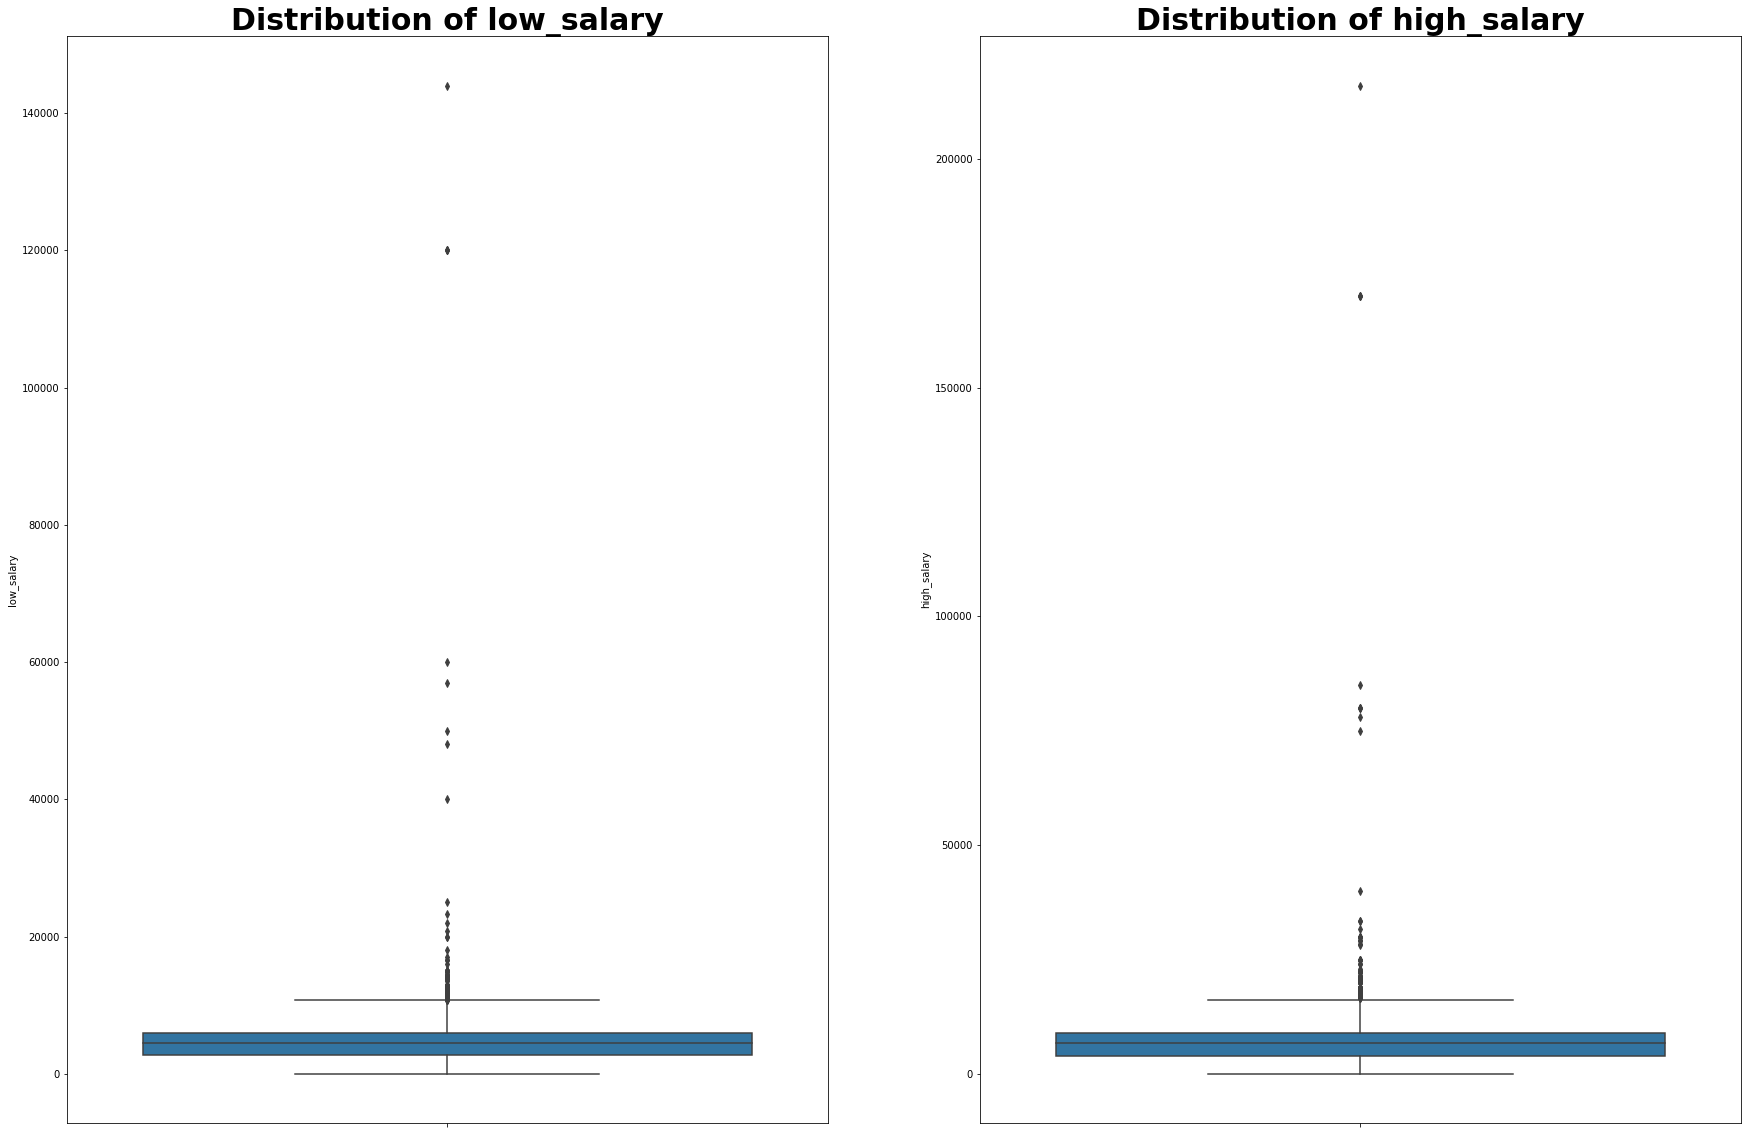

In [46]:
f, ax= plt.subplots(1,2,figsize=(30,20))
sns.boxplot(job_data_no_undisclosed['low_salary'],orient='vert',ax=ax[0])
sns.boxplot(job_data_no_undisclosed['high_salary'],orient='vert')
ax[0].set_title('Distribution of low_salary',fontsize=30,fontweight='bold')
ax[1].set_title('Distribution of high_salary',fontsize=30,fontweight='bold')

plt.show()

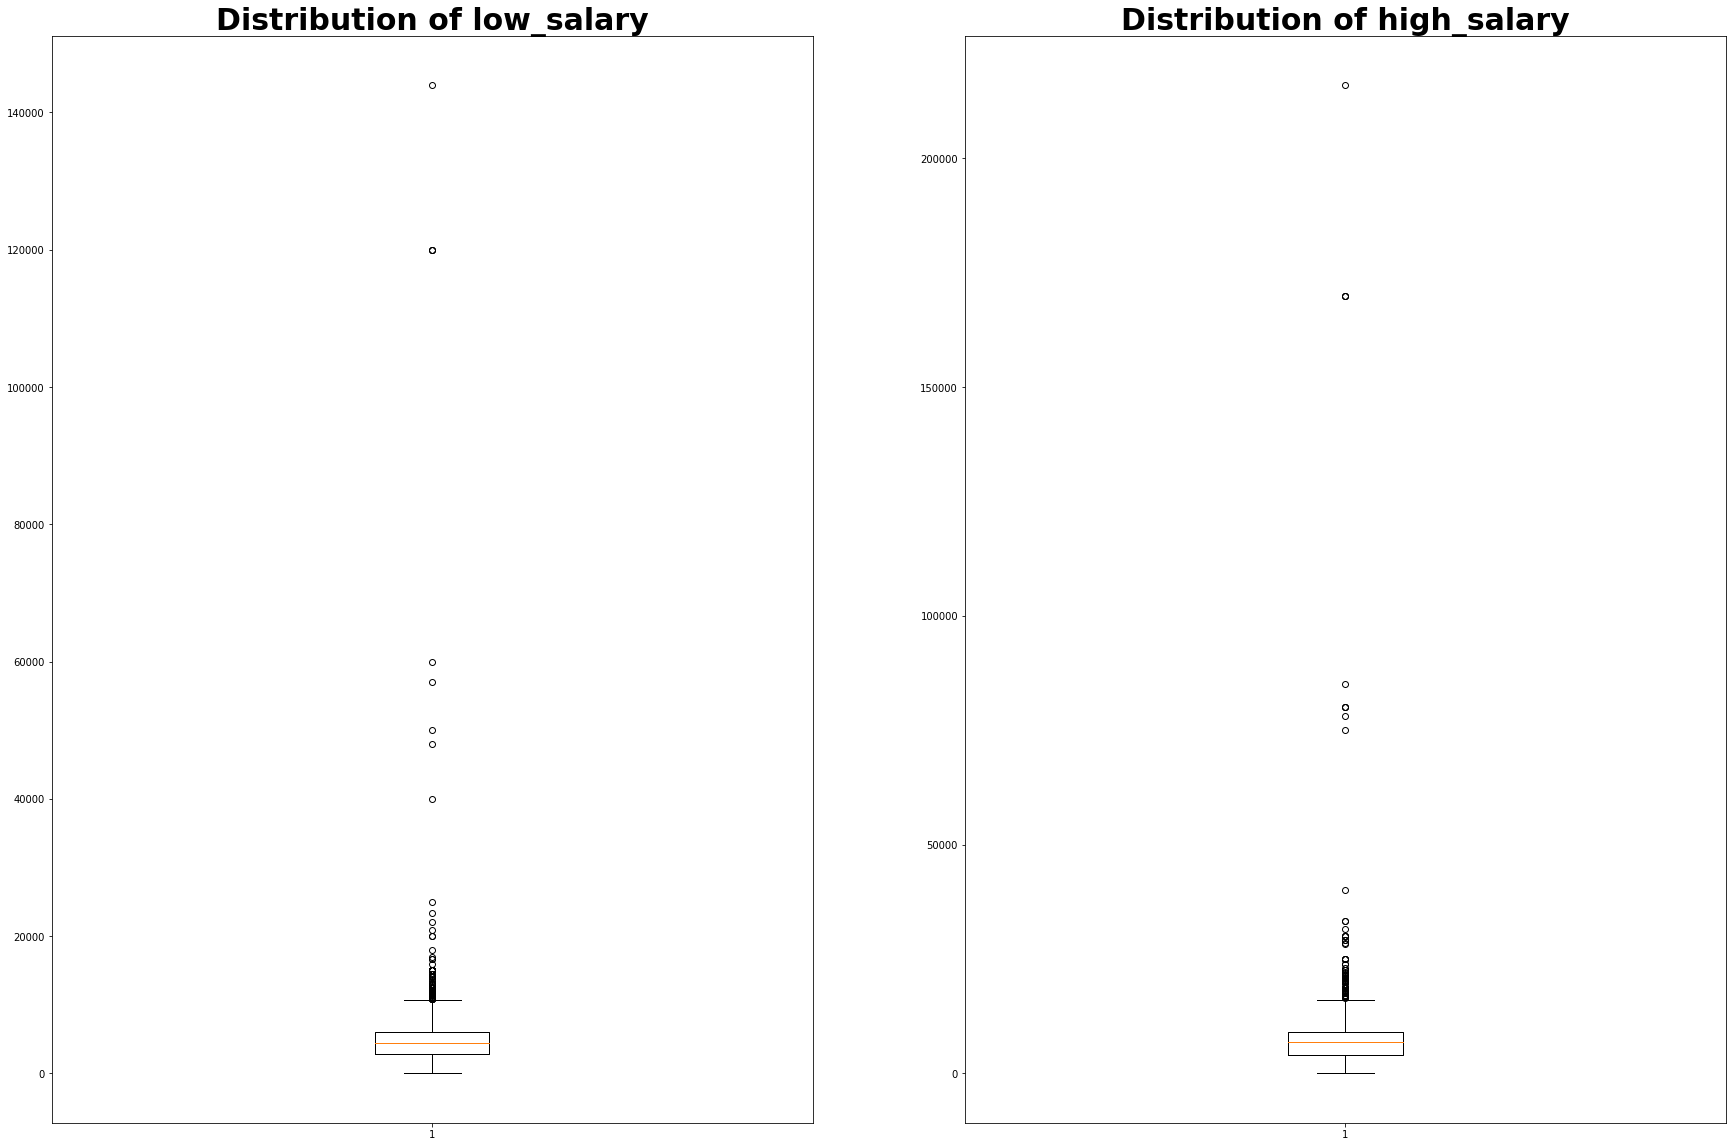

In [47]:
f, ax= plt.subplots(1,2,figsize=(30,20))
ax[0].boxplot(job_data_no_undisclosed['low_salary'])
ax[1].boxplot(job_data_no_undisclosed['high_salary'])
ax[0].set_title('Distribution of low_salary',fontsize=30,fontweight='bold')
ax[1].set_title('Distribution of high_salary',fontsize=30,fontweight='bold')

plt.show()

From the boxplot, we can see that the distribution of the low and high salary are quite similar

In [48]:
job_data_no_undisclosed.describe()

,index,low_salary,high_salary
count,3312.000000,3312.000000,3312.000000
mean,1824.874698,5022.959245,7685.067328
std,1066.437499,5335.819414,8072.215974
min,0.000000,8.000000,8.000000
25%,894.750000,2800.000000,4000.000000
50%,1817.000000,4500.000000,6800.000000
75%,2750.250000,6000.000000,9000.000000
max,3688.000000,144000.000000,216000.000000


From the table, we can determine the 'box' range and calculate the 'whisker' value

This will determine where are the limits of the salary entries and outliers

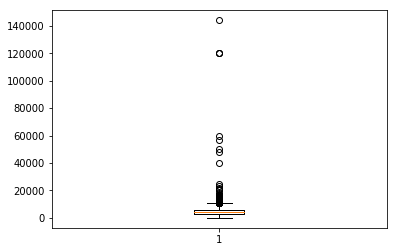

In [49]:
B = plt.boxplot(job_data_no_undisclosed['low_salary'])

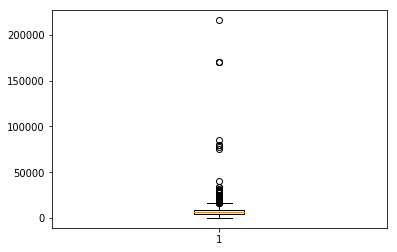

In [50]:
C = plt.boxplot(job_data_no_undisclosed['high_salary'])

In [51]:
# Lower and upper limit for outlier for low_salary
[item.get_ydata() for item in B['caps']]

[array([8., 8.]), array([10750., 10750.])]

In [52]:
# Lower and upper limit for outlier for high_salary
[item.get_ydata() for item in C['caps']]

[array([8., 8.]), array([16083.33, 16083.33])]

In [53]:
#IQR value for low_salary
[item.get_ydata() for item in B['boxes']]

[array([2800., 2800., 6000., 6000., 2800.])]

In [54]:
#IQR value for high_salary
[item.get_ydata() for item in C['boxes']]

[array([4000., 4000., 9000., 9000., 4000.])]

In [55]:
np.median(job_data_no_undisclosed['low_salary'])

4500.0

In [56]:
np.median(job_data_no_undisclosed['high_salary'])

6800.0

In [57]:
# Add in another row to the dataframe for average salary
# (high_salary + low_salary)/2


job_data_no_undisclosed['average_salary'] = (job_data_no_undisclosed['high_salary'] + job_data_no_undisclosed['low_salary'])/2 

In [58]:
job_data_no_undisclosed.head()

,index,company_name,job_title,salary,salary_type,emp_type,seniority,job_cat,job_details,low_salary,high_salary,average_salary
0,0,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,"$4,500to$6,800",Monthly,Full Time,Manager,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,6800.0,5650.0
1,1,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,"$4,500to$7,000",Monthly,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,7000.0,5750.0
2,2,IRISNATION SINGAPORE PTE. LTD.,Campaign Manager,"$4,000to$6,000",Monthly,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4000.0,6000.0,5000.0
3,3,THE SUPREME HR ADVISORY PTE. LTD.,Account Cum Admin / / Senior Level / / 2...,"$2,800to$3,000",Monthly,"Permanent, Full Time",Senior Executive,Consulting,Roles & ResponsibilitiesResponsibilities: Exec...,2800.0,3000.0,2900.0
4,4,THE SUPREME HR ADVISORY PTE. LTD.,Senior Site Engineers / / Electrical / / ...,"$4,000to$5,000",Monthly,"Permanent, Full Time",Senior Executive,Building and Construction,Roles & Responsibilities1) Electrical Minimum...,4000.0,5000.0,4500.0


In [59]:
job_data_no_undisclosed.tail()

,index,company_name,job_title,salary,salary_type,emp_type,seniority,job_cat,job_details,low_salary,high_salary,average_salary
3307,3684,GOVERNMENT TECHNOLOGY AGENCY,Infrastructure Cyber Security Specialist,"$5,000to$9,000",Monthly,Full Time,Middle Management,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesWe are seeking a Infra...,5000.0,9000.0,7000.0
3308,3685,GOVERNMENT TECHNOLOGY AGENCY,Infrastructure Architect (DevOps / Automation),"$5,000to$9,000",Monthly,Full Time,Middle Management,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesWe are looking for a p...,5000.0,9000.0,7000.0
3309,3686,GOVERNMENT TECHNOLOGY AGENCY,"Automation Engineer, ServiceNow","$5,000to$9,000",Monthly,Full Time,Middle Management,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesWe are looking for a p...,5000.0,9000.0,7000.0
3310,3687,GOVERNMENT TECHNOLOGY AGENCY,"DevOps Engineer, Applications Infrastructure","$5,000to$9,000",Monthly,Full Time,Middle Management,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesThe Government Digital...,5000.0,9000.0,7000.0
3311,3688,GOVERNMENT TECHNOLOGY AGENCY,Cloud Infrastructure Architect,"$8,000to$15,000",Monthly,Full Time,Middle Management,"Information Technology, Public / Civil Service",Roles & ResponsibilitiesThe Government Infrast...,8000.0,15000.0,11500.0


In [60]:
# Drop the original index, salary and salary_type (as all salary were already converted to monthly basis)

job_data_no_undisclosed.drop(columns=['index','salary','salary_type'],inplace=True)

In [61]:
# Create a new categorical column (salary_range) of low, medium and high salary
# based on average_salary value
# low salary is salary below 25th percentile exclusive
# medium salary is between 25th to 75th percentile inclusive
# high salary is above 75th percentile exclusive

job_data_no_undisclosed.describe()

,low_salary,high_salary,average_salary
count,3312.000000,3312.000000,3312.000000
mean,5022.959245,7685.067328,6354.013287
std,5335.819414,8072.215974,6638.002333
min,8.000000,8.000000,8.000000
25%,2800.000000,4000.000000,3500.000000
50%,4500.000000,6800.000000,5500.000000
75%,6000.000000,9000.000000,7500.000000
max,144000.000000,216000.000000,180000.000000


In [62]:
def salary_range(average_salary):
    if average_salary < 3500:
        return 'low'
    elif 3500 < average_salary < 7500:
        return 'medium'
    else:
        return 'high'

In [63]:
job_data_no_undisclosed['salary_range'] = job_data_no_undisclosed['average_salary'].apply(salary_range)

In [64]:
job_data_no_undisclosed.head()

,company_name,job_title,emp_type,seniority,job_cat,job_details,low_salary,high_salary,average_salary,salary_range
0,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,Full Time,Manager,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,6800.0,5650.0,medium
1,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,7000.0,5750.0,medium
2,IRISNATION SINGAPORE PTE. LTD.,Campaign Manager,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4000.0,6000.0,5000.0,medium
3,THE SUPREME HR ADVISORY PTE. LTD.,Account Cum Admin / / Senior Level / / 2...,"Permanent, Full Time",Senior Executive,Consulting,Roles & ResponsibilitiesResponsibilities: Exec...,2800.0,3000.0,2900.0,low
4,THE SUPREME HR ADVISORY PTE. LTD.,Senior Site Engineers / / Electrical / / ...,"Permanent, Full Time",Senior Executive,Building and Construction,Roles & Responsibilities1) Electrical Minimum...,4000.0,5000.0,4500.0,medium


In [65]:
job_data_no_undisclosed['salary_range'].value_counts()
# The classes are not considered imbalanced, but there were more in the medium range
# as compared to the high and low
# which is considered typical as the salary ranges follow a sort of normal distribution
# except for a few salary values which were considered super outliers (e.g monthly salary of $144,000 and $8)

medium    1528
high       995
low        789
Name: salary_range, dtype: int64

<div class="alert alert-warning">

## 1b. Feature Engineering of emp_type:
- check number of categories and their occurence (value_counts)
- Get dummy variables for each unique categories



### End Objective: To create dummy variables for emp_type for modelling

In [66]:
job_data_no_undisclosed['emp_type'].value_counts()

Full Time                                                                                  1253
Permanent                                                                                   680
Permanent, Full Time                                                                        582
Contract                                                                                    339
Contract, Full Time                                                                         291
Permanent, Contract, Full Time                                                               33
Permanent, Contract                                                                          26
Temporary, Contract                                                                          23
Temporary                                                                                    21
Part Time, Full Time                                                                          8
Internship                              

In [67]:
emp_dummies = pd.get_dummies(job_data_no_undisclosed['emp_type'],drop_first=True)

In [68]:
emp_dummies.head()

,"Contract, Full Time","Contract, Full Time, Flexi work","Contract, Full Time, Internship","Contract, Internship",Flexi work,"Freelance, Full Time, Flexi work",Full Time,"Full Time, Flexi work","Full Time, Internship",Internship,Part Time,"Part Time, Contract","Part Time, Contract, Full Time, Internship","Part Time, Flexi work, Internship","Part Time, Full Time","Part Time, Full Time, Flexi work","Part Time, Permanent, Contract","Part Time, Permanent, Contract, Freelance, Flexi work","Part Time, Permanent, Flexi work","Part Time, Permanent, Freelance, Full Time, Internship","Part Time, Permanent, Full Time","Part Time, Permanent, Full Time, Flexi work","Part Time, Permanent, Temporary, Contract, Freelance, Full Time, Flexi work, Internship","Part Time, Temporary, Contract, Flexi work","Part Time, Temporary, Contract, Full Time, Flexi work","Part Time, Temporary, Full Time",Permanent,"Permanent, Contract","Permanent, Contract, Full Time","Permanent, Flexi work","Permanent, Full Time","Permanent, Full Time, Flexi work","Permanent, Full Time, Internship","Permanent, Temporary, Contract","Permanent, Temporary, Full Time",Temporary,"Temporary, Contract","Temporary, Contract, Full Time","Temporary, Full Time","Temporary, Internship"
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [69]:
emp_dummies.shape

(3312, 40)

In [70]:
job_data_no_undisclosed.shape

(3312, 10)

In [76]:
job_data_no_undisclosed.head()

,company_name,job_title,emp_type,seniority,job_cat,job_details,low_salary,high_salary,average_salary,salary_range
0,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,Full Time,Manager,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,6800.0,5650.0,medium
1,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,7000.0,5750.0,medium
2,IRISNATION SINGAPORE PTE. LTD.,Campaign Manager,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4000.0,6000.0,5000.0,medium
3,THE SUPREME HR ADVISORY PTE. LTD.,Account Cum Admin / / Senior Level / / 2...,"Permanent, Full Time",Senior Executive,Consulting,Roles & ResponsibilitiesResponsibilities: Exec...,2800.0,3000.0,2900.0,low
4,THE SUPREME HR ADVISORY PTE. LTD.,Senior Site Engineers / / Electrical / / ...,"Permanent, Full Time",Senior Executive,Building and Construction,Roles & Responsibilities1) Electrical Minimum...,4000.0,5000.0,4500.0,medium


In [71]:
# Append the dummy variables for emp_type into the dataframe
job_dummies = pd.concat([job_data_no_undisclosed,emp_dummies],axis=1)

In [72]:
job_dummies_test = job_dummies.iloc[0:10,:]

In [73]:
job_dummies.shape

#check shape to ensure proper concatenation

(3312, 50)

In [74]:
job_dummies.head()

,company_name,job_title,emp_type,seniority,job_cat,job_details,low_salary,high_salary,average_salary,salary_range,"Contract, Full Time","Contract, Full Time, Flexi work","Contract, Full Time, Internship","Contract, Internship",Flexi work,"Freelance, Full Time, Flexi work",Full Time,"Full Time, Flexi work","Full Time, Internship",Internship,Part Time,"Part Time, Contract","Part Time, Contract, Full Time, Internship","Part Time, Flexi work, Internship","Part Time, Full Time","Part Time, Full Time, Flexi work","Part Time, Permanent, Contract","Part Time, Permanent, Contract, Freelance, Flexi work","Part Time, Permanent, Flexi work","Part Time, Permanent, Freelance, Full Time, Internship","Part Time, Permanent, Full Time","Part Time, Permanent, Full Time, Flexi work","Part Time, Permanent, Temporary, Contract, Freelance, Full Time, Flexi work, Internship","Part Time, Temporary, Contract, Flexi work","Part Time, Temporary, Contract, Full Time, Flexi work","Part Time, Temporary, Full Time",Permanent,"Permanent, Contract","Permanent, Contract, Full Time","Permanent, Flexi work","Permanent, Full Time","Permanent, Full Time, Flexi work","Permanent, Full Time, Internship","Permanent, Temporary, Contract","Permanent, Temporary, Full Time",Temporary,"Temporary, Contract","Temporary, Contract, Full Time","Temporary, Full Time","Temporary, Internship"
0,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,Full Time,Manager,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,6800.0,5650.0,medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,7000.0,5750.0,medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,IRISNATION SINGAPORE PTE. LTD.,Campaign Manager,Full Time,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4000.0,6000.0,5000.0,medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,THE SUPREME HR ADVISORY PTE. LTD.,Account Cum Admin / / Senior Level / / 2...,"Permanent, Full Time",Senior Executive,Consulting,Roles & ResponsibilitiesResponsibilities: Exec...,2800.0,3000.0,2900.0,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,THE SUPREME HR ADVISORY PTE. LTD.,Senior Site Engineers / / Electrical / / ...,"Permanent, Full Time",Senior Executive,Building and Construction,Roles & Responsibilities1) Electrical Minimum...,4000.0,5000.0,4500.0,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [75]:
# Drop the original emp_type column

job_dummies.drop(columns=['emp_type'],inplace=True)

In [84]:
# Save the dataframe to a CSV file

job_dummies.to_csv('emp_dummies.csv',index=False)

<div class="alert alert-warning">

## 1c. Feature Engineering of job_title:
- Remove symbols, numbers from job_title
- Segment merged words and stem them (to remove words with duplicate meaning, different forms)



### End Objective: To convert the job_title words into categories which can be used for modelling

In [78]:
# Import libraries for NLP processing 
# segment.segmenter library is downloaded from https://github.com/willf/segment/tree/master/segment
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from textblob import TextBlob, Word
from segment.segmenter import Analyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [79]:
# Remove symbols, numbers from job_title
# some of the job_titles have /, #, numbers etc
import re

job_dummies['job_title1'] = job_dummies['job_title'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

In [80]:
# segment merged words and stemmed them:
# Define functions which can be used later for the 
# job_description column later

def stemmer(text):
    stemmer = SnowballStemmer('english')
    desc = TextBlob(text)
    word_list = [stemmer.stem(word) for word in desc.words]
    result = " ".join(word_list)
    return result

def words_split(text):
    e = Analyzer('en')
    result = []
    desc = TextBlob(text)
    word_lists = [e.segment(word) for word in desc.words]
    for word_list in word_lists:
        for ele in word_list:
            result.append(ele)
    result = " ".join(result)
    return result


<div class="alert alert-danger">

### Alert!: Code below takes a while to run (around 5 to 10 mins)

In [81]:
job_dummies['job_title1']= job_dummies['job_title1'].apply(lambda x : words_split(x))
job_dummies['job_title1'] = job_dummies['job_title1'].apply(lambda x : stemmer(x))

In [82]:
job_dummies.head()

,company_name,job_title,seniority,job_cat,job_details,low_salary,high_salary,average_salary,salary_range,"Contract, Full Time","Contract, Full Time, Flexi work","Contract, Full Time, Internship","Contract, Internship",Flexi work,"Freelance, Full Time, Flexi work",Full Time,"Full Time, Flexi work","Full Time, Internship",Internship,Part Time,"Part Time, Contract","Part Time, Contract, Full Time, Internship","Part Time, Flexi work, Internship","Part Time, Full Time","Part Time, Full Time, Flexi work","Part Time, Permanent, Contract","Part Time, Permanent, Contract, Freelance, Flexi work","Part Time, Permanent, Flexi work","Part Time, Permanent, Freelance, Full Time, Internship","Part Time, Permanent, Full Time","Part Time, Permanent, Full Time, Flexi work","Part Time, Permanent, Temporary, Contract, Freelance, Full Time, Flexi work, Internship","Part Time, Temporary, Contract, Flexi work","Part Time, Temporary, Contract, Full Time, Flexi work","Part Time, Temporary, Full Time",Permanent,"Permanent, Contract","Permanent, Contract, Full Time","Permanent, Flexi work","Permanent, Full Time","Permanent, Full Time, Flexi work","Permanent, Full Time, Internship","Permanent, Temporary, Contract","Permanent, Temporary, Full Time",Temporary,"Temporary, Contract","Temporary, Contract, Full Time","Temporary, Full Time","Temporary, Internship",job_title1
0,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,Manager,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,6800.0,5650.0,medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,senior manag
1,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,7000.0,5750.0,medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,senior manag
2,IRISNATION SINGAPORE PTE. LTD.,Campaign Manager,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4000.0,6000.0,5000.0,medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,campaign manag
3,THE SUPREME HR ADVISORY PTE. LTD.,Account Cum Admin / / Senior Level / / 2...,Senior Executive,Consulting,Roles & ResponsibilitiesResponsibilities: Exec...,2800.0,3000.0,2900.0,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,account cum admin senior level payrol cpf clar...
4,THE SUPREME HR ADVISORY PTE. LTD.,Senior Site Engineers / / Electrical / / ...,Senior Executive,Building and Construction,Roles & Responsibilities1) Electrical Minimum...,4000.0,5000.0,4500.0,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,senior site engin electr m vac bug is senior l...


In [83]:
job_dummies.head()

,company_name,job_title,seniority,job_cat,job_details,low_salary,high_salary,average_salary,salary_range,"Contract, Full Time","Contract, Full Time, Flexi work","Contract, Full Time, Internship","Contract, Internship",Flexi work,"Freelance, Full Time, Flexi work",Full Time,"Full Time, Flexi work","Full Time, Internship",Internship,Part Time,"Part Time, Contract","Part Time, Contract, Full Time, Internship","Part Time, Flexi work, Internship","Part Time, Full Time","Part Time, Full Time, Flexi work","Part Time, Permanent, Contract","Part Time, Permanent, Contract, Freelance, Flexi work","Part Time, Permanent, Flexi work","Part Time, Permanent, Freelance, Full Time, Internship","Part Time, Permanent, Full Time","Part Time, Permanent, Full Time, Flexi work","Part Time, Permanent, Temporary, Contract, Freelance, Full Time, Flexi work, Internship","Part Time, Temporary, Contract, Flexi work","Part Time, Temporary, Contract, Full Time, Flexi work","Part Time, Temporary, Full Time",Permanent,"Permanent, Contract","Permanent, Contract, Full Time","Permanent, Flexi work","Permanent, Full Time","Permanent, Full Time, Flexi work","Permanent, Full Time, Internship","Permanent, Temporary, Contract","Permanent, Temporary, Full Time",Temporary,"Temporary, Contract","Temporary, Contract, Full Time","Temporary, Full Time","Temporary, Internship",job_title1
0,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,Manager,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,6800.0,5650.0,medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,senior manag
1,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,7000.0,5750.0,medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,senior manag
2,IRISNATION SINGAPORE PTE. LTD.,Campaign Manager,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4000.0,6000.0,5000.0,medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,campaign manag
3,THE SUPREME HR ADVISORY PTE. LTD.,Account Cum Admin / / Senior Level / / 2...,Senior Executive,Consulting,Roles & ResponsibilitiesResponsibilities: Exec...,2800.0,3000.0,2900.0,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,account cum admin senior level payrol cpf clar...
4,THE SUPREME HR ADVISORY PTE. LTD.,Senior Site Engineers / / Electrical / / ...,Senior Executive,Building and Construction,Roles & Responsibilities1) Electrical Minimum...,4000.0,5000.0,4500.0,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,senior site engin electr m vac bug is senior l...


In [85]:
# Use TfidVectoriser to convert job_title into categories/features

vect= TfidfVectorizer(ngram_range=(1,2), stop_words='english',min_df=4)

job_title2 = vect.fit_transform(job_dummies['job_title1'])

In [86]:
job_title2.shape

(3312, 756)

In [87]:
type(job_title2)

scipy.sparse.csr.csr_matrix

In [88]:
# Transfom the sparse matrix and put it into a dataframe

job_title2 = pd.DataFrame(vect.fit_transform(job_dummies['job_title1']).todense(),columns=vect.get_feature_names())

In [89]:
job_title2.head()

,aa,aa modif,aa overhaul,aba,academ,account,account admin,account assist,account clerk,account cum,account execut,account manag,account offic,admin,admin assist,admin clerk,admin cum,admin custom,admin execut,admin support,administr,administr account,administr assist,administr clerk,administr execut,administr offic,administr oper,advisor,advisori,advisori servic,advisori singapor,aerospac,aerospac technician,affair,air,alter,alter yx,analysi,analysi engin,analyst,analyst data,analyst develop,analyst senior,analyt,analyt advisori,analyt lead,analyt manag,android,apac,api,applic,applic android,applic consult,applic develop,applic infrastructur,applic support,architect,architectur,art,artist,asia,asia pacif,asset,assist,assist associ,assist engin,assist hr,assist manag,assist month,assist offic,assist vice,assoc,associ,associ advisori,associ consult,associ data,associ director,associ manag,associ region,associ research,asst,assur,audit,auditor,autom,autom engin,avp,avp data,aw,backend,bank,bank group,bank summer,base,bg,bg digit,bi,big,big data,bio,biochemistri,block,block chain,brand,bti,busi,busi analyst,busi analyt,busi consult,busi develop,busi intellig,busi manag,busi oper,busi partner,buyer,cad,campaign,care,center,center oper,centr,centr oper,central,chain,chang,channel,chem,chemic,chief,civil,civil engin,civil structur,claim,clerk,client,client servic,client success,clinic,clinic research,cloud,cloud architect,cloud infrastructur,code,comm,commerc,commerci,commod,communic,complianc,compon,comput,construct,consult,consult senior,consum,consum bank,content,contract,control,coordin,corpor,corpor invest,cost,counsel,creativ,crm,csc,cum,cum account,cum admin,custom,custom experi,custom servic,custom support,cyber,cyber secur,data,data analyst,data analyt,data architect,data center,data centr,data develop,data engin,data entri,data manag,data migrat,data scienc,data scientist,data secur,data specialist,databas,databas administr,day,dba,dbs,dbs transform,decis,deliveri,deliveri manag,demand,depart,deploy,deputi,design,design engin,desk,desktop,dev,dev op,develop,develop engin,develop execut,develop manag,develop ref,dex,di,digit,digit institut,digit market,dilig,director,director medic,doctor,doctor research,document,dr,east,east asia,econom,editor,electr,electr engin,electron,elementari,elementari school,emerg,end,engag,engin,engin art,engin assist,engin bg,engin electr,engin manag,engin manufactur,engin mobil,engin product,engin ref,engin senior,engin softwar,english,enterpris,entri,entri clerk,environ,epc,equip,er,etl,etl develop,event,excel,execut,execut data,execut financ,execut manag,execut senior,experi,experi manag,expert,export,facil,facil engin,facil manag,fellow,fellow biochemistri,fellow code,fico,fico consult,field,fin,fin tech,financ,financ execut,financ manag,financi,financi analyst,financi plan,financi servic,fm,food,food servic,forc,forc develop,freight,function,fx,game,general,general manag,geospati,geotechn,gf,gis,global,googl,googl cloud,group,group financ,haul,head,health,hpc,hr,hr admin,hr execut,human,human resourc,hvac,ic,ict,im,im manag,implement,import,incid,industri,info,info comm,inform,inform secur,inform technolog,infrastructur,innov,insid,insid sale,insight,inspector,institut,institut bank,instrument,instrument design,instrument engin,integr,intellig,intellig analyst,intern,invest,invest analyst,invest bank,investig,io,japanes,japanes speak,java,java develop,junior,lab,laboratori,laboratori offic,languag,lead,lead consult,lead data,lead engin,lead senior,leader,learn,learn engin,lectur,legal,legal counsel,level,loan,logist,long,long term,machin,machin learn,mainten,malaysia,manag,manag analyst,manag apac,manag applic,manag assist,manag busi,manag corpor,manag data,manag digit,manag engin,manag execut,manag financi,manag global,manag manag,manag market,manag oper,manag perform,manag senior,mandarin,manufactur,manufactur engin,market,market assist,market director,market execut,market manag,master,mat

In [90]:
# This is a dataframe with only the vectorized job_title and it already has 756 columns
job_title2.shape

(3312, 756)

In [92]:
# Append average_salary column into the above dataframe as save as a CSV

job_vect_title = pd.concat([job_title2,job_dummies['average_salary']],axis=1)

In [93]:
job_vect_title.head()

,aa,aa modif,aa overhaul,aba,academ,account,account admin,account assist,account clerk,account cum,account execut,account manag,account offic,admin,admin assist,admin clerk,admin cum,admin custom,admin execut,admin support,administr,administr account,administr assist,administr clerk,administr execut,administr offic,administr oper,advisor,advisori,advisori servic,advisori singapor,aerospac,aerospac technician,affair,air,alter,alter yx,analysi,analysi engin,analyst,analyst data,analyst develop,analyst senior,analyt,analyt advisori,analyt lead,analyt manag,android,apac,api,applic,applic android,applic consult,applic develop,applic infrastructur,applic support,architect,architectur,art,artist,asia,asia pacif,asset,assist,assist associ,assist engin,assist hr,assist manag,assist month,assist offic,assist vice,assoc,associ,associ advisori,associ consult,associ data,associ director,associ manag,associ region,associ research,asst,assur,audit,auditor,autom,autom engin,avp,avp data,aw,backend,bank,bank group,bank summer,base,bg,bg digit,bi,big,big data,bio,biochemistri,block,block chain,brand,bti,busi,busi analyst,busi analyt,busi consult,busi develop,busi intellig,busi manag,busi oper,busi partner,buyer,cad,campaign,care,center,center oper,centr,centr oper,central,chain,chang,channel,chem,chemic,chief,civil,civil engin,civil structur,claim,clerk,client,client servic,client success,clinic,clinic research,cloud,cloud architect,cloud infrastructur,code,comm,commerc,commerci,commod,communic,complianc,compon,comput,construct,consult,consult senior,consum,consum bank,content,contract,control,coordin,corpor,corpor invest,cost,counsel,creativ,crm,csc,cum,cum account,cum admin,custom,custom experi,custom servic,custom support,cyber,cyber secur,data,data analyst,data analyt,data architect,data center,data centr,data develop,data engin,data entri,data manag,data migrat,data scienc,data scientist,data secur,data specialist,databas,databas administr,day,dba,dbs,dbs transform,decis,deliveri,deliveri manag,demand,depart,deploy,deputi,design,design engin,desk,desktop,dev,dev op,develop,develop engin,develop execut,develop manag,develop ref,dex,di,digit,digit institut,digit market,dilig,director,director medic,doctor,doctor research,document,dr,east,east asia,econom,editor,electr,electr engin,electron,elementari,elementari school,emerg,end,engag,engin,engin art,engin assist,engin bg,engin electr,engin manag,engin manufactur,engin mobil,engin product,engin ref,engin senior,engin softwar,english,enterpris,entri,entri clerk,environ,epc,equip,er,etl,etl develop,event,excel,execut,execut data,execut financ,execut manag,execut senior,experi,experi manag,expert,export,facil,facil engin,facil manag,fellow,fellow biochemistri,fellow code,fico,fico consult,field,fin,fin tech,financ,financ execut,financ manag,financi,financi analyst,financi plan,financi servic,fm,food,food servic,forc,forc develop,freight,function,fx,game,general,general manag,geospati,geotechn,gf,gis,global,googl,googl cloud,group,group financ,haul,head,health,hpc,hr,hr admin,hr execut,human,human resourc,hvac,ic,ict,im,im manag,implement,import,incid,industri,info,info comm,inform,inform secur,inform technolog,infrastructur,innov,insid,insid sale,insight,inspector,institut,institut bank,instrument,instrument design,instrument engin,integr,intellig,intellig analyst,intern,invest,invest analyst,invest bank,investig,io,japanes,japanes speak,java,java develop,junior,lab,laboratori,laboratori offic,languag,lead,lead consult,lead data,lead engin,lead senior,leader,learn,learn engin,lectur,legal,legal counsel,level,loan,logist,long,long term,machin,machin learn,mainten,malaysia,manag,manag analyst,manag apac,manag applic,manag assist,manag busi,manag corpor,manag data,manag digit,manag engin,manag execut,manag financi,manag global,manag manag,manag market,manag oper,manag perform,manag senior,mandarin,manufactur,manufactur engin,market,market assist,market director,market execut,market manag,master,mat

In [94]:
# Finally, save the dataframe as a CSV file

job_vect_title.to_csv('job_vect_title.csv',index=False)

<div class="alert alert-warning">

## 1d. Feature Engineering of job_description:
- Similar process to that job_title



### End Objective: To convert the job_description words into categories which can be used for modelling

In [95]:
job_dummies['job_details1'] = job_dummies['job_details'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

<div class="alert alert-danger">

### Alert!: Code below takes a while to run (around 5 to 10 mins)

In [96]:
job_dummies['job_details1']= job_dummies['job_details'].apply(lambda x : words_split(x))
job_dummies['job_details1'] = job_dummies['job_details'].apply(lambda x : stemmer(x))

In [97]:
job_dummies.head()

,company_name,job_title,seniority,job_cat,job_details,low_salary,high_salary,average_salary,salary_range,"Contract, Full Time","Contract, Full Time, Flexi work","Contract, Full Time, Internship","Contract, Internship",Flexi work,"Freelance, Full Time, Flexi work",Full Time,"Full Time, Flexi work","Full Time, Internship",Internship,Part Time,"Part Time, Contract","Part Time, Contract, Full Time, Internship","Part Time, Flexi work, Internship","Part Time, Full Time","Part Time, Full Time, Flexi work","Part Time, Permanent, Contract","Part Time, Permanent, Contract, Freelance, Flexi work","Part Time, Permanent, Flexi work","Part Time, Permanent, Freelance, Full Time, Internship","Part Time, Permanent, Full Time","Part Time, Permanent, Full Time, Flexi work","Part Time, Permanent, Temporary, Contract, Freelance, Full Time, Flexi work, Internship","Part Time, Temporary, Contract, Flexi work","Part Time, Temporary, Contract, Full Time, Flexi work","Part Time, Temporary, Full Time",Permanent,"Permanent, Contract","Permanent, Contract, Full Time","Permanent, Flexi work","Permanent, Full Time","Permanent, Full Time, Flexi work","Permanent, Full Time, Internship","Permanent, Temporary, Contract","Permanent, Temporary, Full Time",Temporary,"Temporary, Contract","Temporary, Contract, Full Time","Temporary, Full Time","Temporary, Internship",job_title1,job_details1
0,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,Manager,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,6800.0,5650.0,medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,senior manag,role responsibilitiesw ’ re iri concis www.iri...
1,IRISNATION SINGAPORE PTE. LTD.,Senior Manager,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4500.0,7000.0,5750.0,medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,senior manag,role responsibilitiesw ’ re iri concis www.iri...
2,IRISNATION SINGAPORE PTE. LTD.,Campaign Manager,Middle Management,Advertising / Media,Roles & ResponsibilitiesWe’re Iris Concise (ww...,4000.0,6000.0,5000.0,medium,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,campaign manag,role responsibilitiesw ’ re iri concis www.iri...
3,THE SUPREME HR ADVISORY PTE. LTD.,Account Cum Admin / / Senior Level / / 2...,Senior Executive,Consulting,Roles & ResponsibilitiesResponsibilities: Exec...,2800.0,3000.0,2900.0,low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,account cum admin senior level payrol cpf clar...,role responsibilitiesrespons execut and financ...
4,THE SUPREME HR ADVISORY PTE. LTD.,Senior Site Engineers / / Electrical / / ...,Senior Executive,Building and Construction,Roles & Responsibilities1) Electrical Minimum...,4000.0,5000.0,4500.0,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,senior site engin electr m vac bug is senior l...,role responsibilities1 electr minimum 5 year a...


In [116]:
# Use TfidVectoriser to convert job_description into categories/features
# If no max features are set, the number of columns is about 50k for ngram (1,2)
vect= TfidfVectorizer(ngram_range=(1,2), stop_words='english',min_df=4,max_features=100)
job_details2 = vect.fit_transform(job_dummies['job_details1'])

In [117]:
job_details2

<3312x100 sparse matrix of type '<class 'numpy.float64'>'
	with 126485 stored elements in Compressed Sparse Row format>

In [118]:
job_details2 = pd.DataFrame(vect.fit_transform(job_dummies['job_details1']).todense(),columns=vect.get_feature_names())

In [119]:
job_details2.head()

,abil,abl,account,activ,analysi,analyt,applic,assist,build,busi,candid,chang,client,communic,compani,comput,custom,data,degre,design,develop,document,drive,effect,engin,ensur,environ,excel,execut,experi,financi,function,global,good,high,identifi,implement,improv,includ,industri,inform,integr,intern,issu,key,knowledg,lead,learn,level,maintain,manag,market,meet,model,need,network,new,offic,oper,opportun,perform,plan,prefer,prepar,problem,process,product,program,project,provid,qualiti,region,relat,relev,report,requir,research,respons,review,role,sale,secur,servic,skill,softwar,solut,strategi,strong,support,team,technic,technolog,test,time,tool,understand,use,user,work,year
0,0.046827,0.0,0.000000,0.109542,0.053212,0.263381,0.0,0.0,0.055427,0.211422,0.057661,0.0,0.359766,0.000000,0.0,0.0,0.105044,0.313783,0.045305,0.100988,0.151981,0.000000,0.063409,0.114260,0.000000,0.00000,0.0,0.000000,0.058507,0.178077,0.0,0.000000,0.206271,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.051871,0.0,0.0,0.0,0.0,0.042701,0.161975,0.0,0.0,0.000000,0.000000,0.481575,0.0,0.0,0.000000,0.070026,0.050312,0.123695,0.144551,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.096890,0.123569,0.130389,0.042882,0.0,0.074463,0.000000,0.000000,0.000000,0.000000,0.0,0.033320,0.0,0.103028,0.0,0.0,0.000000,0.0,0.0,0.053303,0.193725,0.091583,0.041427,0.139425,0.000000,0.000000,0.0,0.000000,0.0,0.050433,0.094867,0.0,0.208964,0.035964
1,0.046801,0.0,0.000000,0.109480,0.053182,0.263232,0.0,0.0,0.055395,0.211302,0.057629,0.0,0.359562,0.000000,0.0,0.0,0.104984,0.313605,0.045279,0.100931,0.151895,0.000000,0.063373,0.114196,0.000000,0.00000,0.0,0.000000,0.058474,0.177975,0.0,0.000000,0.206154,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.051841,0.0,0.0,0.0,0.0,0.042677,0.161883,0.0,0.0,0.000000,0.033711,0.481301,0.0,0.0,0.000000,0.069986,0.050283,0.123624,0.144469,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.096835,0.123498,0.130315,0.042858,0.0,0.074421,0.000000,0.000000,0.000000,0.000000,0.0,0.033301,0.0,0.102969,0.0,0.0,0.000000,0.0,0.0,0.053273,0.193615,0.091531,0.041404,0.139345,0.000000,0.000000,0.0,0.000000,0.0,0.050405,0.094813,0.0,0.208845,0.035944
2,0.000000,0.0,0.000000,0.000000,0.000000,0.059807,0.0,0.0,0.000000,0.144026,0.000000,0.0,0.272313,0.043989,0.0,0.0,0.238529,0.148442,0.000000,0.057330,0.086278,0.000000,0.071993,0.064864,0.000000,0.00000,0.0,0.055562,0.066427,0.033697,0.0,0.000000,0.234195,0.053127,0.117737,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.048482,0.000000,0.0,0.0,0.000000,0.076592,0.615114,0.0,0.0,0.065897,0.079506,0.057123,0.140440,0.273533,0.0,0.0,0.115402,0.061619,0.000000,0.0,0.0,0.110006,0.070148,0.098693,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.029244,0.0,0.0,0.000000,0.0,0.0,0.060519,0.219951,0.155971,0.000000,0.118724,0.061116,0.236647,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.169466,0.040833
3,0.082302,0.0,0.445311,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.297271,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.091916,0.000000,0.000000,0.000000,0.192697,0.000000,0.000000,0.000000,0.16204,0.0,0.000000,0.308490,0.104327,0.0,0.103865,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.158614,0.0,0.273501,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.186181,0.177849,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.326103,0.084686,0.0,0.0,0.000000,0.000000,0.196404,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.082644,0.189952,0.163252,0.055378,0.0,0.000000,0.0,0.135809,0.0,0.0,0.085443,0.0,0.0,0.000000,0.000000,0.000000,0.218435,0.061262,0.000000,0.000000,0.0,0.094528,0.0,0.000000,0.000000,0.0,0.157401,0.126420
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.164530,0.000000,0.317715,0.000000,0.000000,0.000000,0.000000,0.167623,0.00000,0.0,0.000000,0.000000,0.466866,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.106117,0.000000,0.0,0.0,0.000000,0

In [120]:
job_details2.shape

(3312, 100)

In [121]:
# Finally, save the dataframe as a CSV file

job_details2.to_csv('job_vect_details.csv',index=False)